# INTEGRANTES - TA3
* Mauro Imanol Obermeyer Adauto Angulo
* Jair Stephano Rodriguez Calla
* David Joaquín Niño Suárez

# Requisitos

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD

# Carga de datos

In [29]:
!gdown 1WfaWrcxVV6LNQhX0ZdSJDfL4ote4HeU5
!gdown 1L3DvwUf-vZUe5MGVUHWecFd1WfIGlaZ5

Downloading...
From: https://drive.google.com/uc?id=1WfaWrcxVV6LNQhX0ZdSJDfL4ote4HeU5
To: /content/X.npy
100% 12.1M/12.1M [00:00<00:00, 39.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L3DvwUf-vZUe5MGVUHWecFd1WfIGlaZ5
To: /content/y.npy
100% 1.34k/1.34k [00:00<00:00, 5.32MB/s]


In [30]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

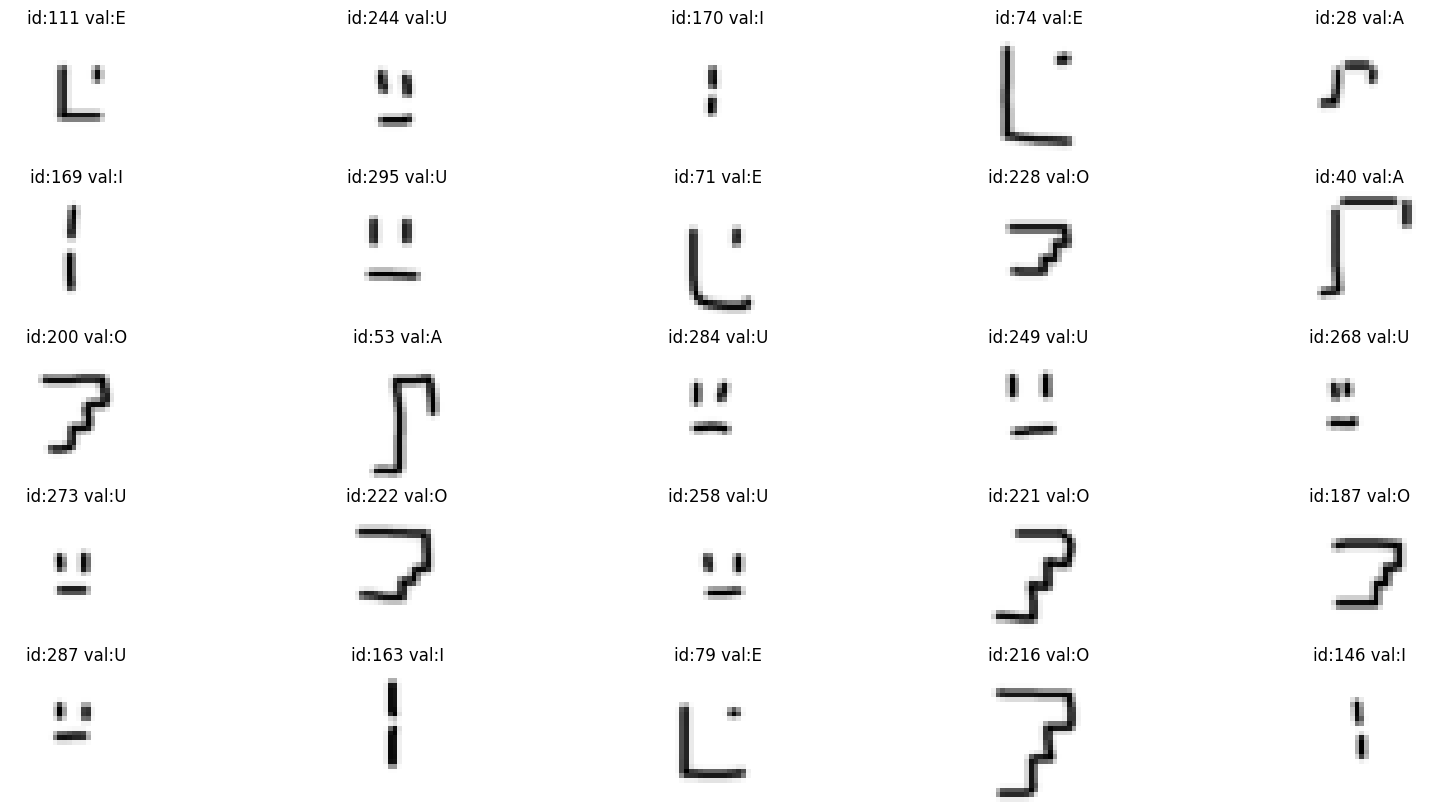

In [44]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Entrenamiento del modelo

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(241, 28, 28, 1) (61, 28, 28, 1)


In [72]:
bs = 16
lr = 0.0001
class_mapping = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,1)),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(5, activation='softmax')]) #no modificar

In [73]:
optimizer1 = SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 3, 3, 128)        

In [74]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=1000, validation_data=(X_test, y_test))
model.save('modelo_entrenado.h5')

Epoch 1/1000
16/16 [==============================] - 1s 30ms/step - loss: 1.6163 - accuracy: 0.2116 - val_loss: 1.6110 - val_accuracy: 0.1803
Epoch 2/1000
16/16 [==============================] - 0s 21ms/step - loss: 1.6160 - accuracy: 0.2116 - val_loss: 1.6108 - val_accuracy: 0.1803
Epoch 3/1000
16/16 [==============================] - 0s 19ms/step - loss: 1.6158 - accuracy: 0.2116 - val_loss: 1.6106 - val_accuracy: 0.1803
Epoch 4/1000
16/16 [==============================] - 0s 16ms/step - loss: 1.6156 - accuracy: 0.2116 - val_loss: 1.6104 - val_accuracy: 0.1803
Epoch 5/1000
16/16 [==============================] - 0s 17ms/step - loss: 1.6153 - accuracy: 0.2116 - val_loss: 1.6102 - val_accuracy: 0.1803
Epoch 6/1000
16/16 [==============================] - 0s 17ms/step - loss: 1.6151 - accuracy: 0.2116 - val_loss: 1.6099 - val_accuracy: 0.1803
Epoch 7/1000
16/16 [==============================] - 0s 16ms/step - loss: 1.6148 - accuracy: 0.2116 - val_loss: 1.6097 - val_accuracy: 0.1803

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Probando el modelo

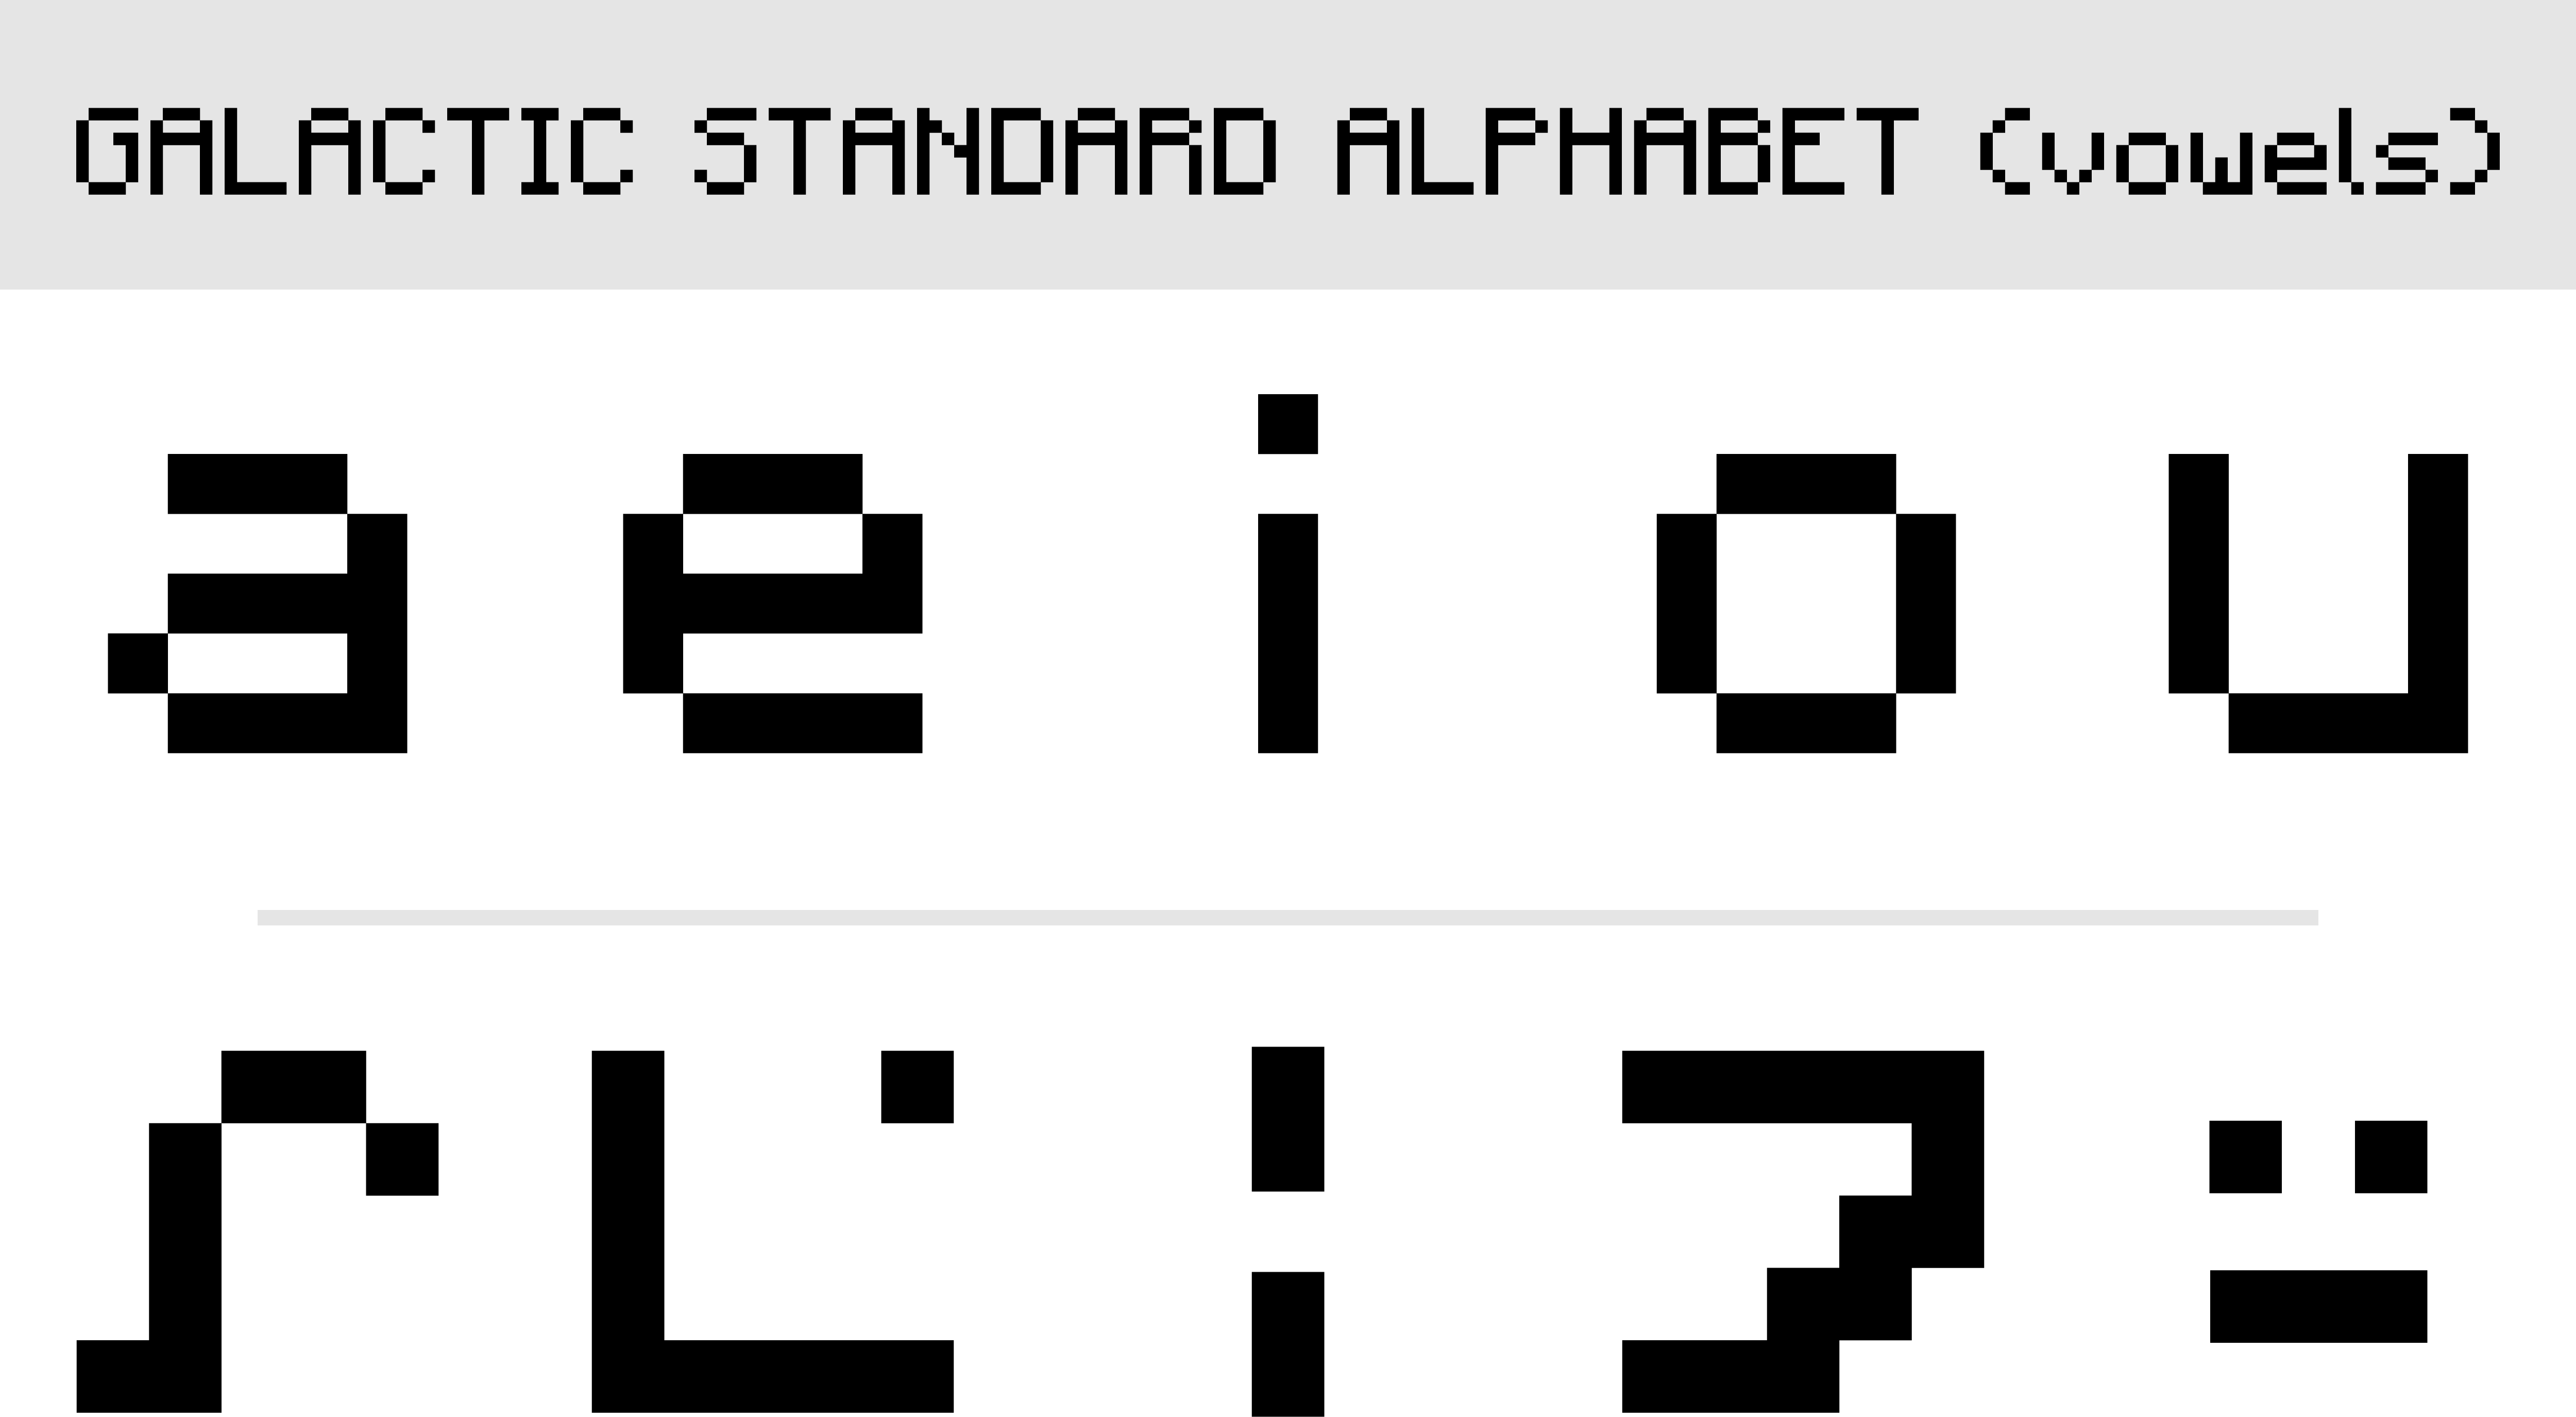

Fuente: Elaboración propia

El Alfabeto Galáctico Estándar es una serie de 26 símbolos que representan las letras del abecedario ordenamente (sin contar la 'ñ'). Este alfabeto es utilizado en la mesa de encantamientos de Minecraft donde se representan encantamientos, a las herramientas o armas del jugador, mediante símbolos.

In [112]:
#Probando modelo
simbolo_tag = {0: 'A', 1: 'E', 2: 'I', 3: 'O', 4: 'U'}

In [113]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
valor_simbolo = simbolo_tag.get(label, 'Desconocida')

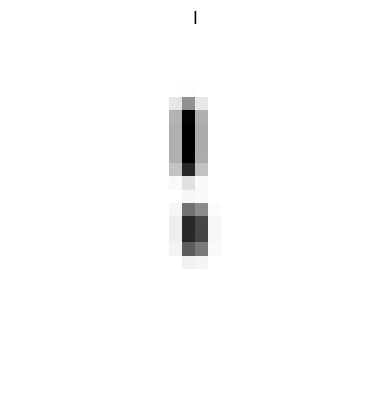

In [114]:
plt.title('{}'.format(valor_simbolo))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()


In [115]:
#Usando el modelo
salida = model.predict(im[None,:,:,:])[0]

1/1 [==============================] - 0s 16ms/step


In [116]:
for x in range(len(salida)):
  print("{}: {:.2f}%".format(simbolo_tag[x], salida[x] * 100))

A: 18.29%
E: 12.77%
I: 26.75%
O: 18.92%
U: 23.27%


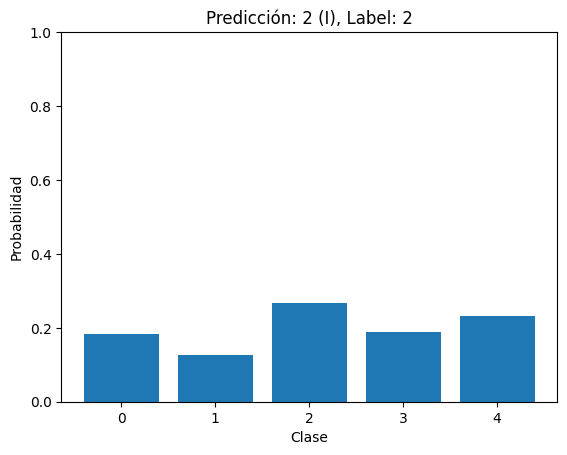

In [117]:
plt.figure()
plt.title("Predicción: {} ({}), Label: {}".format(salida.argmax(), valor_simbolo, label))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()